In [78]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [113]:
#Loading the data
data = pd.read_csv('bank_customers.csv')
data[:3]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [109]:
#Making a copy of the original data
data2 = data[:]
data2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [81]:
data.shape

(10127, 21)

In [82]:
##Checking the information in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [83]:
data.duplicated().sum()

0

In [84]:
#Checking for missing values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [85]:
# Get summary statistics for each column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


# UNIVARIATE ANALYSIS

In [86]:
data.Card_Category.value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [87]:
data.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [88]:
data.Education_Level.value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [89]:
data.Marital_Status.value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [90]:
data.Income_Category.value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [91]:
data.Dependent_count.value_counts()

Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64

In [92]:
# Select only alphabetic columns 
string_columns= data.select_dtypes(include= ['object'])
string_columns[:3]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue


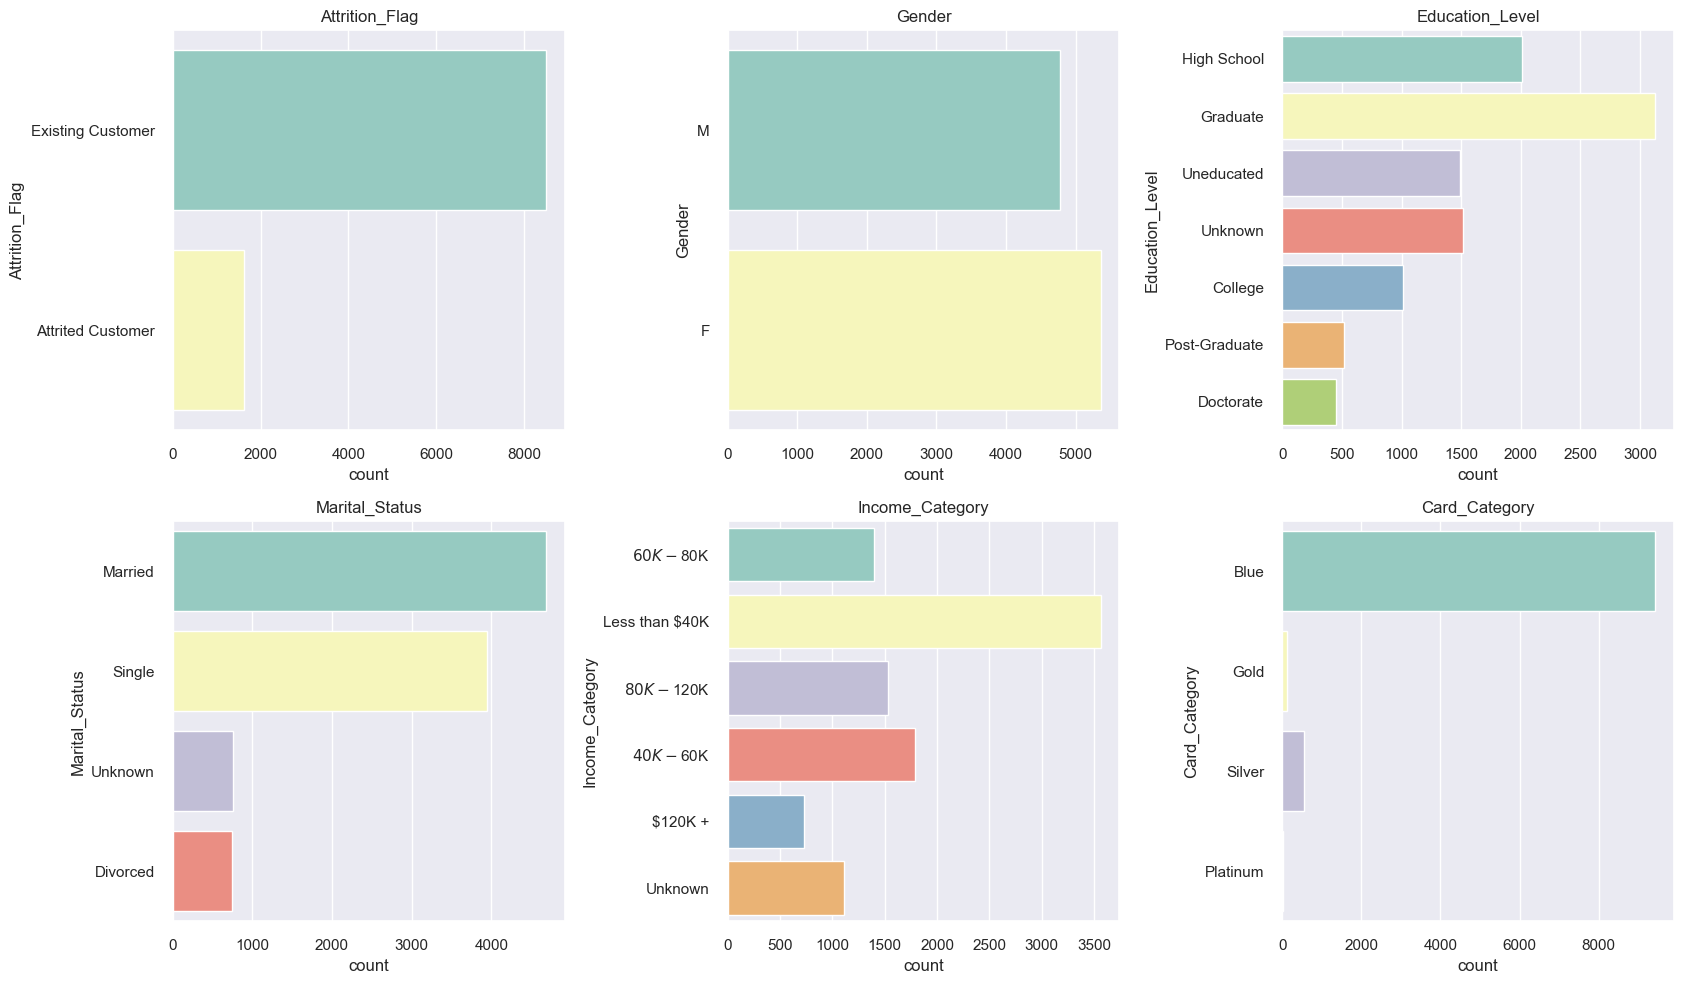

In [93]:
string_data= data.select_dtypes(include= ['object']) 

# Create subplots
plt.figure(figsize=(17, 10))  # Set the figure size
for i, col in enumerate(string_data, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(y= string_data[col], palette='Set3' )
    plt.title(col)

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()

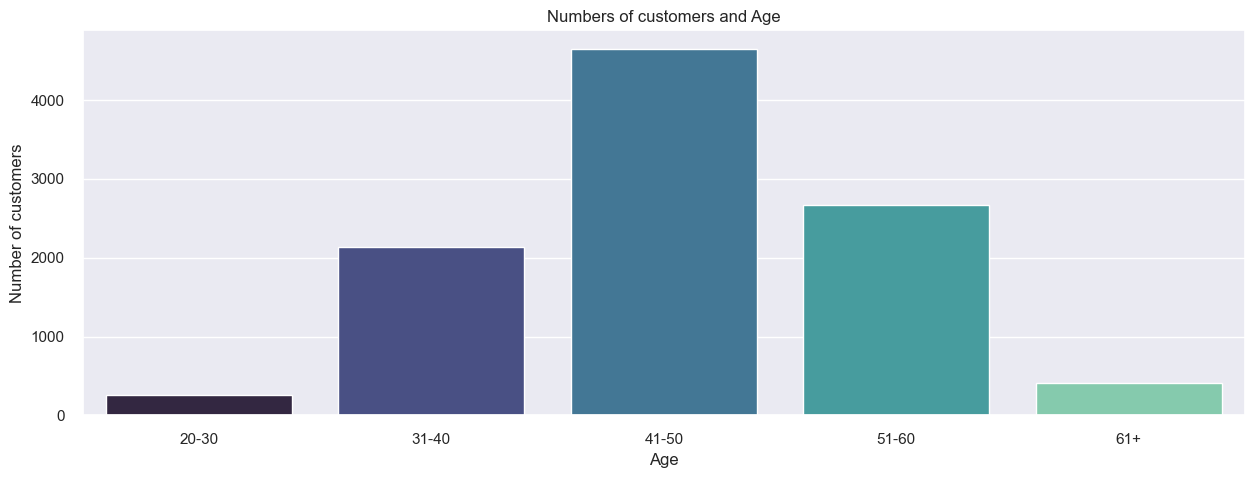

In [94]:
#data.Customer_Age.value_counts()

age_20_30 = data.Customer_Age[(data.Customer_Age >= 20) & (data.Customer_Age <= 30)]
age_31_40 = data.Customer_Age[(data.Customer_Age >= 31) & (data.Customer_Age <= 40)]
age_41_50 = data.Customer_Age[(data.Customer_Age >= 41) & (data.Customer_Age <= 50)]
age_51_60 = data.Customer_Age[(data.Customer_Age >= 51) & (data.Customer_Age <= 60)]
age_61above = data.Customer_Age[(data.Customer_Age >= 61)] 

age_x = ['20-30', '31-40', '41-50', '51-60', '61+']
age_y = [len(age_20_30.values), len(age_31_40.values), len(age_41_50.values), len(age_51_60.values), len(age_61above.values)]

plt.figure(figsize=(15,5))
sns.barplot(x=age_x, y=age_y, palette='mako')
plt.title('Numbers of customers and Age')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

In [121]:
# Select only numeric columns for correlation
numeric_columns= data.select_dtypes(include= ['number'])

#Drop the "clientnum" column
numeric_columns = numeric_columns.drop(['CLIENTNUM'], axis=1)

#View the data
numeric_columns[:2]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


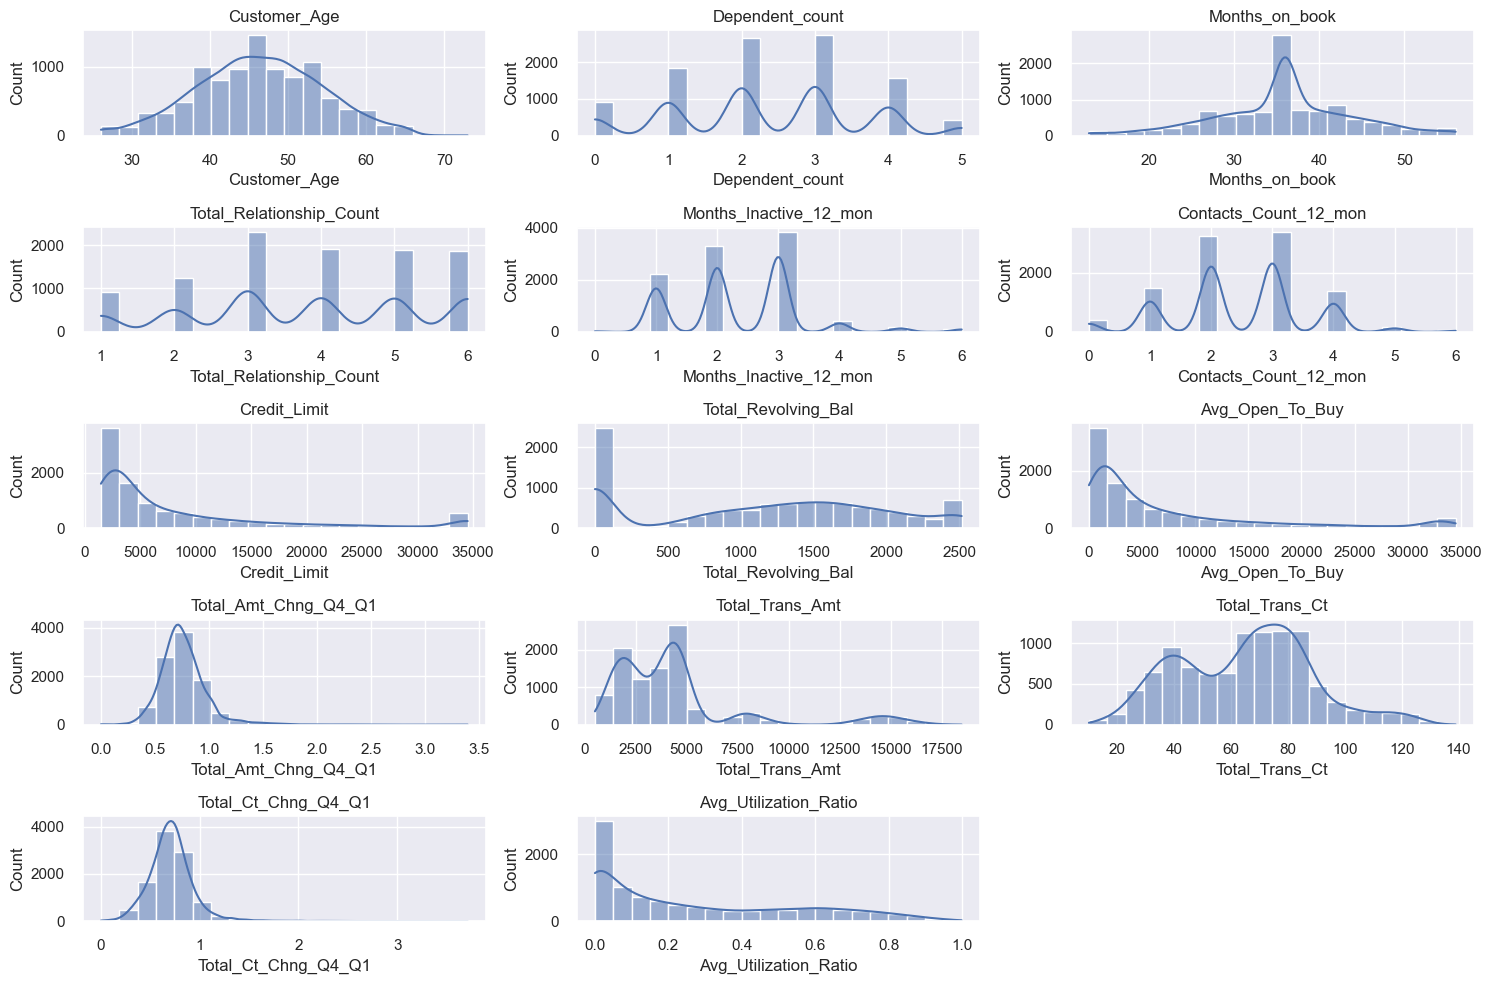

In [96]:
# Create subplots (distribution plots) for all numeric columns 

# Create subplots
plt.figure(figsize=(15, 10))  # Set the figure size
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 3 columns
    sns.histplot(numeric_columns[col], bins=20, kde=True)
    
    plt.title(col)

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()

In [ ]:
# Create subplots (count plots) for all categorical columns 
string_data= data.select_dtypes(include= ['object']) 

# Create subplots
plt.figure(figsize=(17, 10))  # Set the figure size
for i, col in enumerate(string_data, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(y= string_data[col], palette='Set3' )
    plt.title(col)

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()


# Create subplots (distribution plots) for all numeric columns 
#Show mean and median in each plot
plt.figure(figsize=(15, 10))  # Set the figure size
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 3 columns
    sns.histplot(numeric_columns[col], bins=20, kde=True)
    plt.axvline(numeric_columns[col].mean(), color="green", linestyle="--")
    plt.axvline(numeric_columns[col].median(), color="black", linestyle="-")
    plt.title(col)

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()



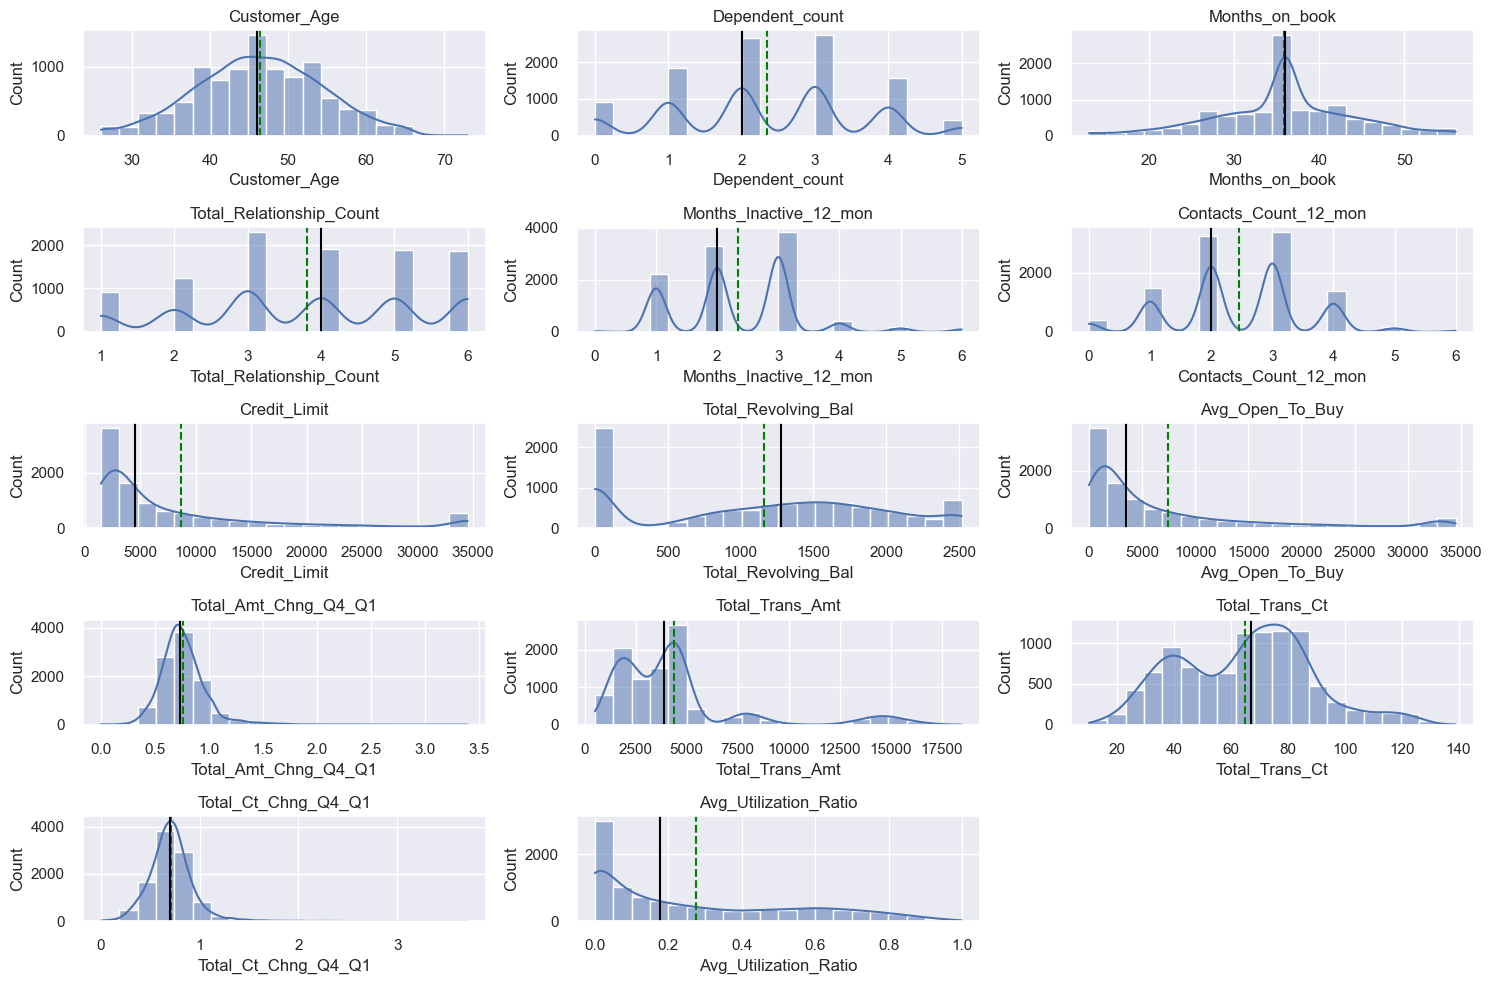

In [97]:
# Create subplots (distribution plots) for all numeric columns 
#Show mean and median in each plot

plt.figure(figsize=(15, 10))  # Set the figure size
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 3 columns
    sns.histplot(numeric_columns[col], bins=20, kde=True)
    plt.axvline(numeric_columns[col].mean(), color="green", linestyle="--")
    plt.axvline(numeric_columns[col].median(), color="black", linestyle="-")
    plt.title(col)

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()

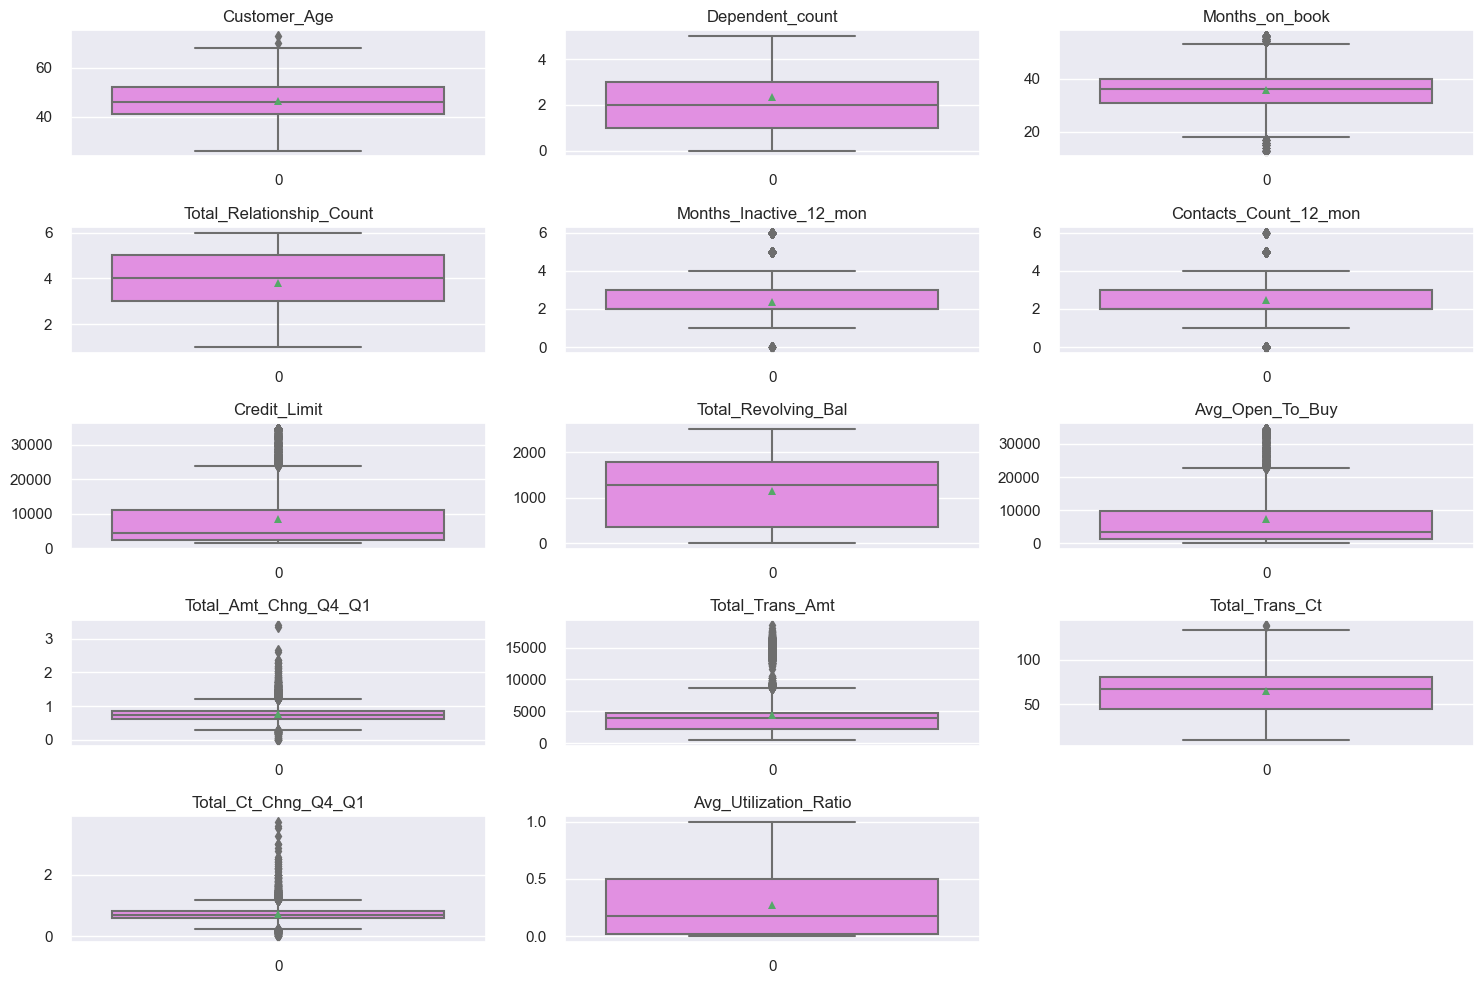

In [98]:
## Create subplots (boxplot) for all numeric columns

plt.figure(figsize=(15, 10))  # Set the figure size
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 3 columns
    sns.boxplot(numeric_columns[col], showmeans=True, color="violet")
    plt.title(col)

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()